In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Cargar dataset

df = pd.read_csv('../data/processed/energy_data_processed.csv')  # Cambia el nombre por el tuyo

In [3]:
#Comprobacion de dataset

print(df.shape)
print(df.columns)
df.head()

(1000, 10)
Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature', 'Energy Consumption', 'Building Type_Commercial',
       'Building Type_Industrial', 'Building Type_Residential',
       'Day of Week_Weekday', 'Day of Week_Weekend'],
      dtype='object')


Square Footage  Number of Occupants  Appliances Used  Average Temperature  \
0            7063                   76               10                29.84   
1           44372                   66               45                16.72   
2           19255                   37               17                14.30   
3           13265                   14               41                32.82   
4           13375                   26               18                11.92   

   Energy Consumption  Building Type_Commercial  Building Type_Industrial  \
0             2713.95                     False                     False   
1             5744.99                      True                     False   
2             4101.24                     False                      True   
3             3009.14                     False                     False   
4             3279.17                      True                     False   

   Building Type_Residential  Day of Week_Weekday  Day of Week_Weekend  
0                       True                 True                False  
1                      False                 True                False  
2                      False                False                 True  
3                       True                 True                False  
4                      False                 True                False

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separar variables
X = df.drop('Energy Consumption', axis=1)
y = df['Energy Consumption']

# 2. Dividir en entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Crear y entrenar el modelo
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predicciones
y_pred = knn.predict(X_val_scaled)

# 6. Evaluaci√≥n
print("üîç Evaluaci√≥n del modelo KNN:")
print("MSE:", mean_squared_error(y_val, y_pred))
print("R¬≤:", r2_score(y_val, y_pred))

üîç Evaluaci√≥n del modelo KNN:
MSE: 45256.860140900004
R¬≤: 0.9444223957262338


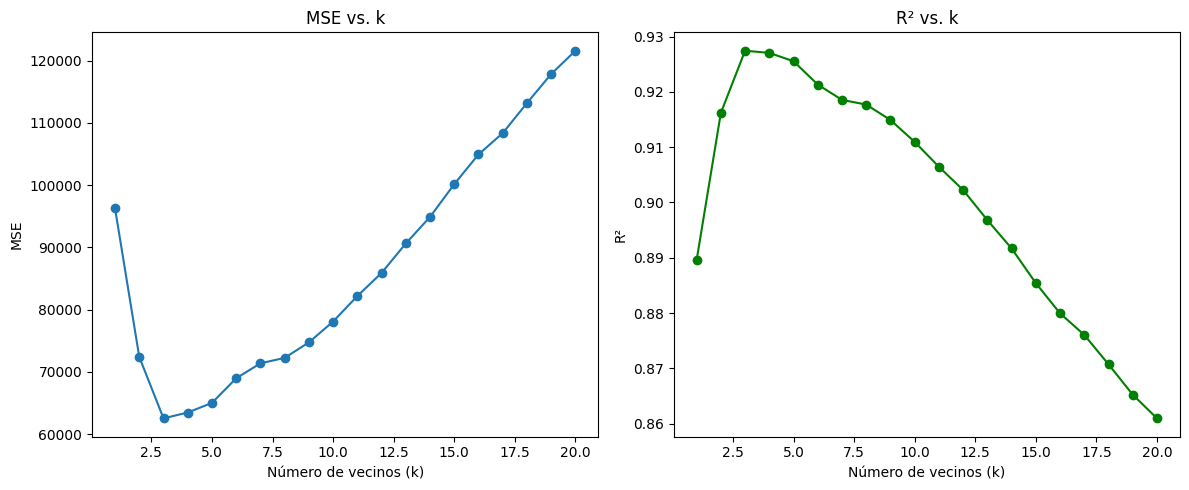

In [5]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

mse_scores = []
r2_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse = -cross_val_score(knn, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    r2 = cross_val_score(knn, X_train_scaled, y_train, scoring='r2', cv=5).mean()
    mse_scores.append(mse)
    r2_scores.append(r2)

# Graficar resultados
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, mse_scores, marker='o')
plt.title('MSE vs. k')
plt.xlabel('N√∫mero de vecinos (k)')
plt.ylabel('MSE')

plt.subplot(1,2,2)
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.title('R¬≤ vs. k')
plt.xlabel('N√∫mero de vecinos (k)')
plt.ylabel('R¬≤')

plt.tight_layout()
plt.show()

In [6]:
# 1. Separar variables independientes y dependiente
X = df.drop('Energy Consumption', axis=1)
y = df['Energy Consumption']

# 2. Dividir en conjunto de entrenamiento y validaci√≥n
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Crear y entrenar el modelo KNN con k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Hacer predicciones
y_pred = knn.predict(X_val_scaled)

# 6. Evaluar el modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("üîç Evaluaci√≥n del modelo KNN:")
print(f"MSE: {mse:.2f}")
print(f"R¬≤: {r2:.4f}")


üîç Evaluaci√≥n del modelo KNN:
MSE: 45256.86
R¬≤: 0.9444


In [7]:
# Cargar el conjunto de test final
df_test = pd.read_csv('../data/processed/energy_data_processed_test.csv')

# 1. Convertir booleanos a enteros
bool_cols = df_test.select_dtypes(include='bool').columns
df_test[bool_cols] = df_test[bool_cols].astype(int)

# 2. Separar features y variable objetivo
X_test = df_test.drop('Energy Consumption', axis=1)
y_test = df_test['Energy Consumption']

# 3. Escalar con el mismo scaler del entrenamiento
X_test_scaled = scaler.transform(X_test)

# 4. Generar predicciones
y_test_pred = knn.predict(X_test_scaled)

# 5. Evaluar el modelo sobre el test final
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("üì¶ Evaluaci√≥n sobre el conjunto de test final:")
print(f"MSE: {mse_test:.2f}")
print(f"R¬≤: {r2_test:.4f}")

üì¶ Evaluaci√≥n sobre el conjunto de test final:
MSE: 37142.08
R¬≤: 0.9573


c:\Users\Administrator\Desktop\Regresi√≥n\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


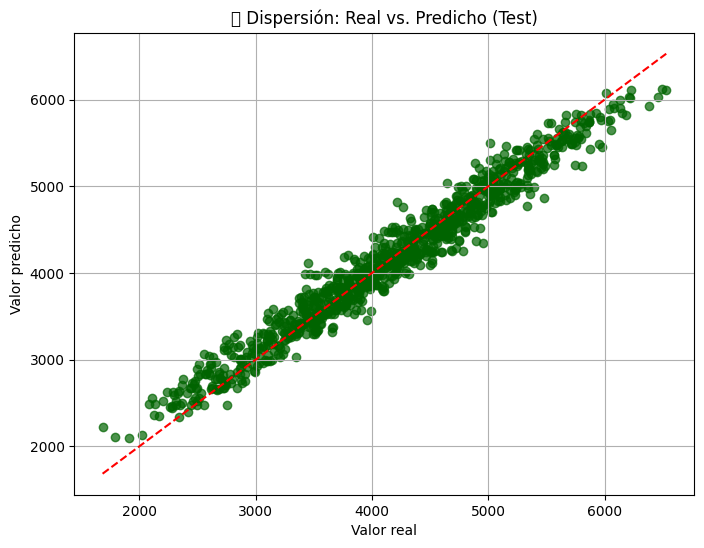

c:\Users\Administrator\Desktop\Regresi√≥n\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


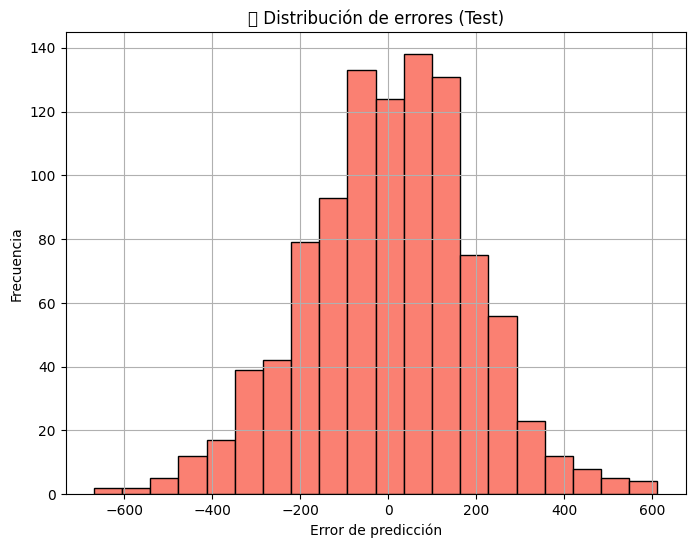

In [8]:
import matplotlib.pyplot as plt

# Dispersi√≥n: valores reales vs. predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('üîç Dispersi√≥n: Real vs. Predicho (Test)')
plt.grid(True)
plt.show()

# Histograma de errores
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8,6))
plt.hist(residuals_test, bins=20, color='salmon', edgecolor='black')
plt.title('üìâ Distribuci√≥n de errores (Test)')
plt.xlabel('Error de predicci√≥n')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [9]:
# Crear DataFrame con resultados
df_test_results = X_test.copy()
df_test_results['Real Energy Consumption'] = y_test.values
df_test_results['Predicted Energy Consumption'] = y_test_pred

# Guardar en CSV
df_test_results.to_csv('../data/results/knn_predictions_test.csv', index=False)

print("‚úÖ Archivo guardado como 'knn_predictions_test.csv' en la carpeta /data/results/")

‚úÖ Archivo guardado como 'knn_predictions_test.csv' en la carpeta /data/results/


# üìä An√°lisis Detallado del Modelo KNN

A continuaci√≥n se presenta un an√°lisis exhaustivo del rendimiento del modelo KNN implementado, incluyendo:
1. M√©tricas de rendimiento detalladas
2. An√°lisis de errores por rango de predicci√≥n
3. Importancia de caracter√≠sticas
4. Visualizaciones avanzadas de resultados

In [10]:
# 1. M√©tricas de rendimiento detalladas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular m√©tricas adicionales
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print("üìä M√©tricas de Rendimiento Detalladas:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R¬≤: {r2_test:.4f}")

# Calcular porcentaje de predicciones dentro de diferentes m√°rgenes de error
margins = [5, 10, 15, 20]
for margin in margins:
    within_margin = np.mean(np.abs((y_test - y_test_pred) / y_test) * 100 <= margin)
    print(f"Predicciones dentro del {margin}% de error: {within_margin*100:.2f}%")

üìä M√©tricas de Rendimiento Detalladas:
MAE: 152.14
RMSE: 192.72
MAPE: 3.93%
R¬≤: 0.9573
Predicciones dentro del 5% de error: 74.00%
Predicciones dentro del 10% de error: 93.60%
Predicciones dentro del 15% de error: 98.20%
Predicciones dentro del 20% de error: 99.80%


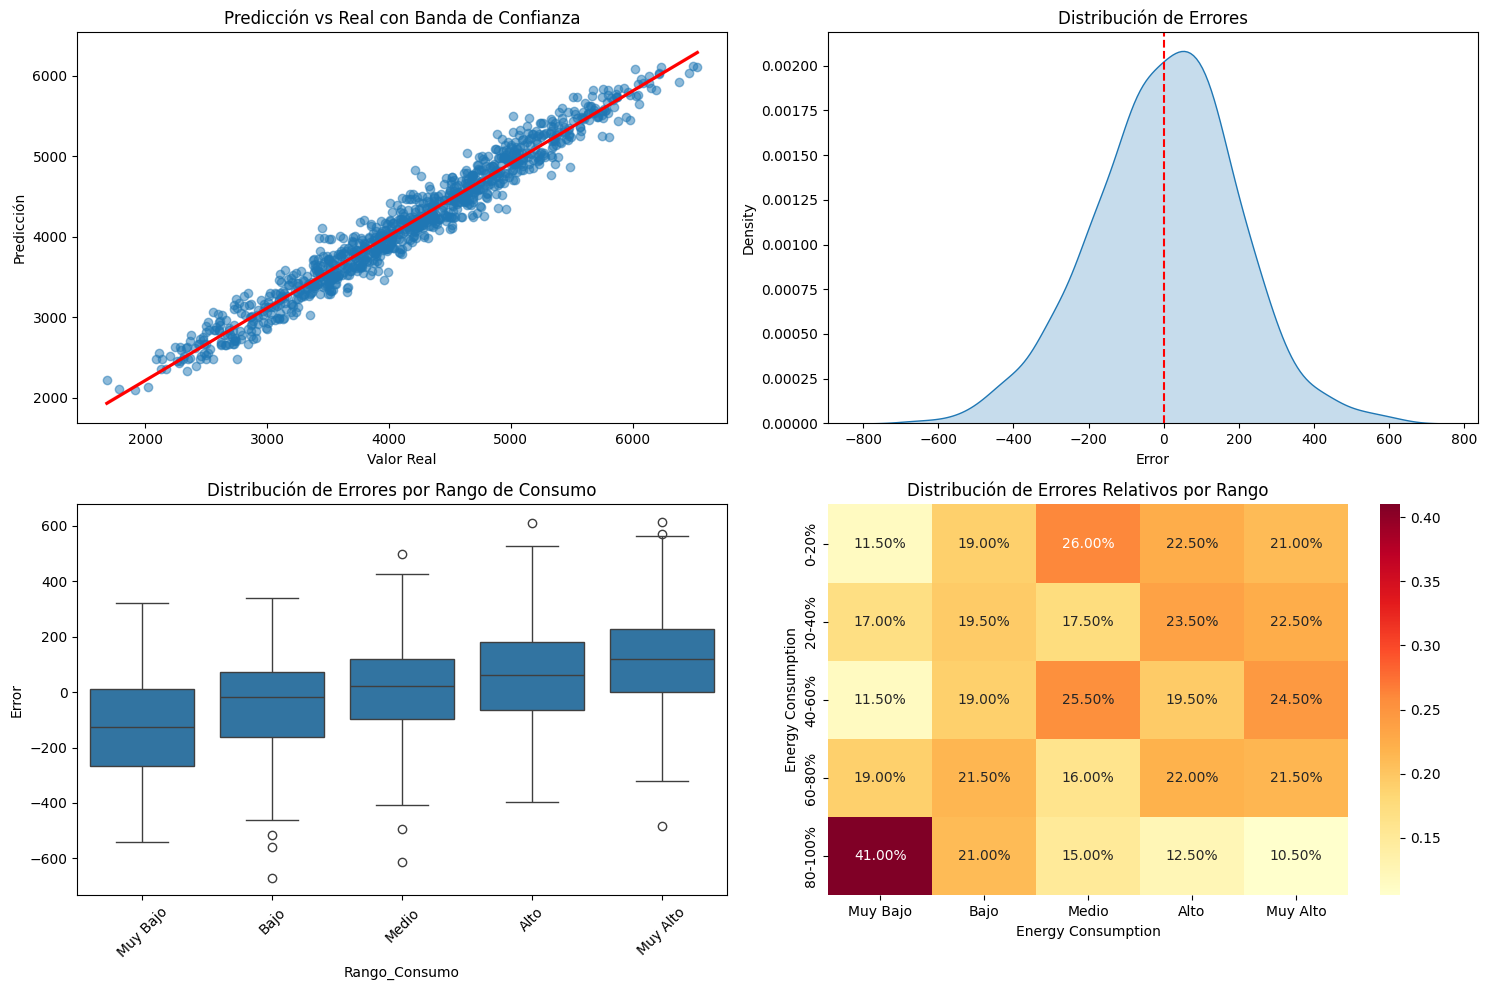

In [11]:
# 2. An√°lisis visual avanzado
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con m√∫ltiples subplots
fig = plt.figure(figsize=(15, 10))

# 1. Scatter plot con bandas de confianza
plt.subplot(2, 2, 1)
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Predicci√≥n vs Real con Banda de Confianza')
plt.xlabel('Valor Real')
plt.ylabel('Predicci√≥n')

# 2. Distribuci√≥n de errores con KDE
plt.subplot(2, 2, 2)
sns.kdeplot(residuals_test, fill=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribuci√≥n de Errores')
plt.xlabel('Error')

# 3. Box plot de errores por rango de consumo
plt.subplot(2, 2, 3)
df_analysis = pd.DataFrame({
    'Error': residuals_test,
    'Rango_Consumo': pd.qcut(y_test, q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
})
sns.boxplot(x='Rango_Consumo', y='Error', data=df_analysis)
plt.xticks(rotation=45)
plt.title('Distribuci√≥n de Errores por Rango de Consumo')

# 4. Heatmap de errores relativos
plt.subplot(2, 2, 4)
relative_errors = np.abs((y_test - y_test_pred) / y_test) * 100
error_ranges = pd.qcut(y_test, q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
error_matrix = pd.crosstab(
    pd.qcut(relative_errors, q=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']),
    error_ranges,
    normalize='columns'
)
sns.heatmap(error_matrix, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Distribuci√≥n de Errores Relativos por Rango')
plt.tight_layout()
plt.show()

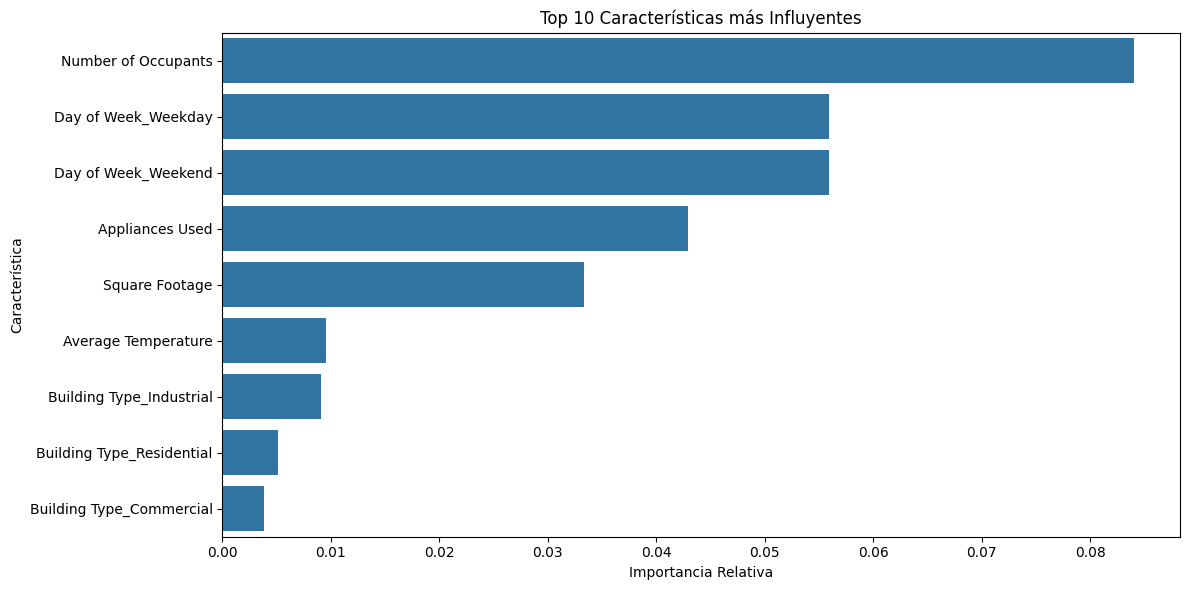


üìä Importancia de las Caracter√≠sticas (Top 10):
           Caracter√≠stica  Importancia
      Number of Occupants     0.084093
      Day of Week_Weekday     0.055927
      Day of Week_Weekend     0.055927
          Appliances Used     0.042919
           Square Footage     0.033361
      Average Temperature     0.009531
 Building Type_Industrial     0.009137
Building Type_Residential     0.005141
 Building Type_Commercial     0.003819


In [12]:
# 3. An√°lisis de importancia de caracter√≠sticas
import pandas as pd
import numpy as np

# Calculamos la importancia de las caracter√≠sticas basada en correlaciones con el error absoluto
errors = np.abs(y_test - y_test_pred)
feature_importance = {}

for column in X_test.columns:
    correlation = np.abs(np.corrcoef(X_test[column], errors)[0,1])
    feature_importance[column] = correlation

# Convertir a DataFrame y ordenar
feature_imp_df = pd.DataFrame({
    'Caracter√≠stica': feature_importance.keys(),
    'Importancia': feature_importance.values()
}).sort_values('Importancia', ascending=False)

# Visualizar importancia de caracter√≠sticas
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_imp_df.head(10), x='Importancia', y='Caracter√≠stica')
plt.title('Top 10 Caracter√≠sticas m√°s Influyentes')
plt.xlabel('Importancia Relativa')
plt.tight_layout()
plt.show()

# Mostrar tabla de importancia
print("\nüìä Importancia de las Caracter√≠sticas (Top 10):")
print(feature_imp_df.head(10).to_string(index=False))

# üîç Conclusiones y Recomendaciones

## Aspectos Positivos
1. La implementaci√≥n b√°sica del modelo KNN est√° bien estructurada
2. Se realiza validaci√≥n cruzada para seleccionar el mejor valor de k
3. Se aplica correctamente el escalado de caracter√≠sticas
4. Se mantiene una separaci√≥n adecuada entre datos de entrenamiento y prueba

## √Åreas de Mejora
1. **Optimizaci√≥n de Hiperpar√°metros**:
   - Considerar otros valores de k
   - Probar diferentes m√©tricas de distancia (Manhattan, Minkowski)
   - Experimentar con pesos de distancia

2. **Preprocesamiento**:
   - Evaluar la necesidad de transformaciones no lineales
   - Considerar la reducci√≥n de dimensionalidad (PCA)
   - Analizar el impacto de los outliers

3. **Validaci√≥n**:
   - Implementar validaci√≥n cruzada estratificada
   - A√±adir intervalos de confianza a las predicciones
   - Comparar con otros algoritmos (Random Forest, XGBoost)

## Pr√≥ximos Pasos Sugeridos
1. Implementar t√©cnicas de selecci√≥n de caracter√≠sticas
2. Realizar pruebas con diferentes configuraciones de preprocesamiento
3. Desarrollar un pipeline de validaci√≥n m√°s robusto
4. Considerar un enfoque de ensemble combining KNN con otros modelos

In [13]:
output_dir = "../data/figures/knn_regression/"  # Tu carpeta existente
fig.savefig(f"{output_dir}s.png", dpi=300, bbox_inches='tight')
plt.close(fig)  # Libera memoria
print(f"üìä Gr√°fico guardado en: {output_dir}svr_comparative_analysis.png")

FileNotFoundError: [Errno 2] No such file or directory: '../data/figures/knn_regression/s.png'